In [1]:
import os 
from sys import platform
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

if platform == 'linux2':
    home = '/data/'
elif platform == 'darwin': 
    home = '/Users/67981492/'
    
obs_data = pd.read_csv(os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/av_est.csv'))

In [2]:
obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B,v_est,a_est
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,2.385458,1.0,0,36,0.305556,0.099471,0.000000,0.000000,NaN,NaN
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,1.939019,1.0,1,36,0.305556,0.035079,-1.241007,0.000000,0.489341,1.036777
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,2.498060,1.0,2,36,0.305556,0.023075,-0.595781,-1.241007,-0.010970,1.039001
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,1.742433,1.0,3,36,0.305556,0.019881,-0.306135,-0.595781,0.249152,1.039416
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,2.350417,1.0,4,36,0.305556,0.018539,-0.139394,-0.306135,0.365923,1.039526


In [5]:
obs_data[['a_est_z', 'v_est_z']] = obs_data.groupby(['ID'])[['a_est', 'v_est']].transform(lambda x: stats.zscore(x, nan_policy='omit'))

In [6]:
obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B,v_est,a_est,a_est_z,v_est_z
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,0,36,0.305556,0.099471,0.000000,0.000000,NaN,NaN,NaN,NaN
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,1,36,0.305556,0.035079,-1.241007,0.000000,0.489341,1.036777,0.045557,-0.662807
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,2,36,0.305556,0.023075,-0.595781,-1.241007,-0.010970,1.039001,0.437093,-1.736615
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,3,36,0.305556,0.019881,-0.306135,-0.595781,0.249152,1.039416,0.510081,-1.178319
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,4,36,0.305556,0.018539,-0.139394,-0.306135,0.365923,1.039526,0.529504,-0.927697


(array([   25.,   223.,  1140.,  3698., 12919., 22203., 14382.,  2654.,
          313.,    42.]),
 array([-5.08664801, -4.15084862, -3.21504922, -2.27924983, -1.34345043,
        -0.40765104,  0.52814836,  1.46394775,  2.39974715,  3.33554654,
         4.27134594]),
 <a list of 10 Patch objects>)

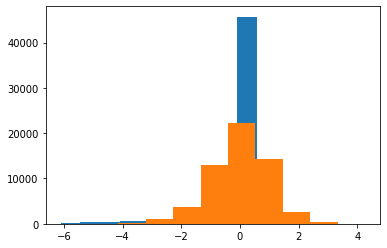

In [8]:
plt.hist(obs_data.a_est_z)
plt.hist(obs_data.v_est_z)

In [10]:
obs_data.to_csv(os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/av_est.csv'), index=False)